In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#q1
data = {
    "Temp" : [50,50,50,70,70,70,80,80,80,90,90,90,100,100,100],
    "Yield" : [3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3.0,3.1,2.8,3.3,3.5,3.0]
    
    
}
df = pd.DataFrame(data)

In [3]:
df.to_csv('yield.csv')

In [51]:
#y = b0 + b1*x
def linearreg(inp,out):
    X = inp
    Y = out
    Xmean = X.mean()
    Ymean = Y.mean()
    xy = np.sum((X - Xmean)*(Y - Ymean))
    x2 = np.sum((X - Xmean)**2)
    b1 = xy/x2
    b0 = Ymean - Xmean*b1
    print(f'b1 : {b1} , b0 : {b0}')
    predY = b0 + X*b1
    
    print(f'Predicted Y {predY}')
    mse = np.sum(((Y - predY)**2)/15)
    rmse = np.sum(((Y - predY)**2)/15)**0.5

    print(f'mse : {mse}, rmse : {rmse}')
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, Y, color='blue', label='Raw Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatterplot of Raw Data')
    
    linear_fit = np.polyfit(X, Y, 1)
    linear_fit_line = np.poly1d(linear_fit)
    
    quadratic_fit = np.polyfit(X, Y, 2)
    quadratic_fit_line = np.poly1d(quadratic_fit)
    
    x_fit = np.linspace(min(X), max(X), 100)
    
    plt.plot(x_fit, linear_fit_line(x_fit), color='red', label='Linear Fit', linestyle='--')
    plt.plot(x_fit, quadratic_fit_line(x_fit), color='green', label='Quadratic Fit', linestyle='--')

    plt.show()
    
    

b1 : 0.006756756756756758 , b0 : 2.306306306306306
Predicted Y 0     2.644144
1     2.644144
2     2.644144
3     2.779279
4     2.779279
5     2.779279
6     2.846847
7     2.846847
8     2.846847
9     2.914414
10    2.914414
11    2.914414
12    2.981982
13    2.981982
14    2.981982
Name: Temp, dtype: float64
mse : 0.13270870870870877, rmse : 0.36429206511905904


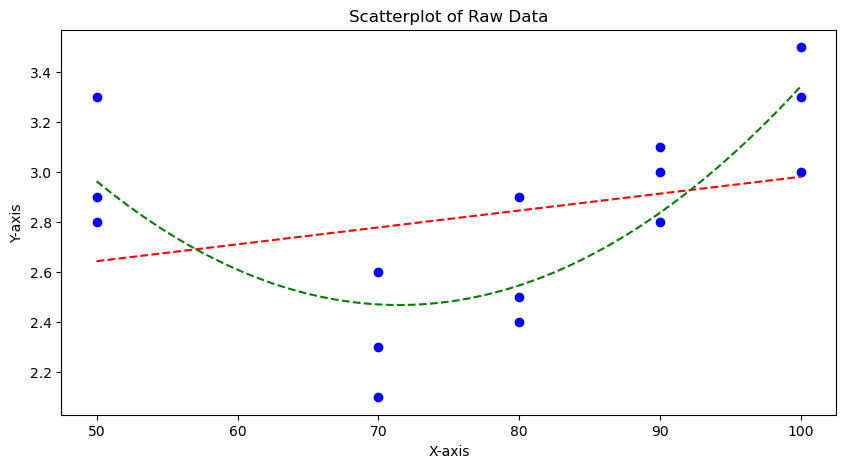

In [52]:
linearreg(df["Temp"],df["Yield"])

In [49]:
#y = b0 + b1*x + b2*x2
def polyreg(inp,out):
    X = inp
    X2 = inp**2
    Y = out
    
    n = len(X)
    agg_x = np.sum(X)
    agg_x2 = np.sum(X2)
    agg_x3 = np.sum(np.dot(X,X2))
    agg_x4 = np.sum(np.dot(X2,X2))
    agg_y = np.sum(Y)
    agg_xy = np.sum(np.dot(X,Y))
    agg_x2y = np.sum(np.dot(X2,Y))
    
    X_mat = np.array([[n,agg_x,agg_x2],
                     [agg_x,agg_x2,agg_x3],
                     [agg_x2,agg_x3,agg_x4]])
    Y_mat = np.array([[agg_y],
                     [agg_xy],
                     [agg_x2y]])
    
    a_mat = np.zeros((3,1))
    a_mat = np.matmul(np.linalg.inv(X_mat),Y_mat)
    print(f'b0 : {a_mat[0]}, b1 : {a_mat[1]}, b2 : {a_mat[2]}')
    predY  = a_mat[0] + a_mat[1]*X + a_mat[2]*X2
    print(f"Predicted : {predY}")
    mse = np.sum(((Y - predY)**2)/15)
    rmse = np.sum(((Y - predY)**2)/15)**0.5

    print(f'mse : {mse}, rmse : {rmse}')
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, Y, color='blue', label='Raw Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatterplot of Raw Data')
    
    quadratic_fit = np.polyfit(X, Y, 2)
    quadratic_fit_line = np.poly1d(quadratic_fit)
    x_fit = np.linspace(min(X), max(X), 100)
    
    plt.plot(x_fit, quadratic_fit_line(x_fit), color='green', label='Quadratic Fit', linestyle='--')
    plt.show()
    

b0 : [7.9604811], b1 : [-0.15371134], b2 : [0.0010756]
Predicted : 0     2.963918
1     2.963918
2     2.963918
3     2.471134
4     2.471134
5     2.471134
6     2.547423
7     2.547423
8     2.547423
9     2.838832
10    2.838832
11    2.838832
12    3.345361
13    3.345361
14    3.345361
Name: Temp, dtype: float64
mse : 0.04778465063001145, rmse : 0.21859700508015076


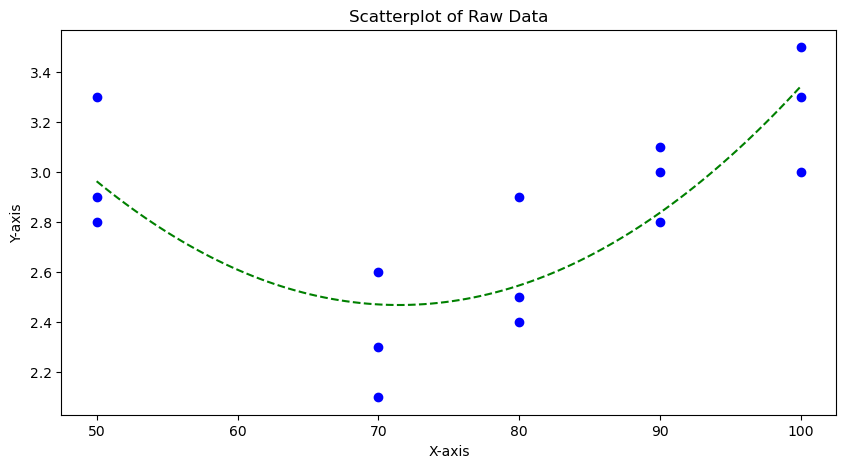

In [50]:
polyreg(df["Temp"],df["Yield"])

In [55]:
#q2
data = {
    'Infarc': [0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
               0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35,
               0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538,
               0.625, 0.974],
    'Area': [0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47,
             0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22,
             0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19,
             1.22, 1.4],
    'Group': [3]*10 + [1]*10 + [2]*12,
    'X2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
           0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0],
    'X3': [0]*10 + [1]*10 + [1]*12
}
df = pd.DataFrame(data)
df.to_csv('rabbit.csv')

In [88]:
#q2
#y = b0 + b1*x1 + b2*x2 + b3*x3
def multireg(inp1,inp2,inp3,out):
    x1 = inp1
    x2 = inp2
    x3 = inp3
    y = out
    
    X_mat = np.array([[len(x1), np.sum(x1), np.sum(x2), np.sum(x3)],
[np.sum(x1), np.sum(x1*x1), np.sum(x1*x2), np.sum(x1*x3)],
[np.sum(x2), np.sum(x2*x1), np.sum(x2*x2), np.sum(x2*x3)],
[np.sum(x3), np.sum(x3*x1), np.sum(x3*x2), np.sum(x3*x3)]
])

    Y_mat = np.array([
np.sum(y),
np.sum(x1*y),
np.sum(x2*y),
np.sum(x3*y)
])

    a_mat = np.linalg.solve(X_mat,Y_mat)
    print(f' b0 : {a_mat[0]}, b1 : {a_mat[1]}, b2 : {a_mat[2]}, b3 : {a_mat[3]}')
    beta = a_mat
    predY  = a_mat[0] + a_mat[1]*x1 + a_mat[2]*x2 + a_mat[3]*x3
    print(f"Predicted : {predY}")
    mse = np.sum(((y - predY)**2)/32)
    rmse = np.sum(((y - predY)**2)/32)**0.5

    print(f'mse : {mse}, rmse : {rmse}')
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, x3, c=y, cmap='inferno', s=50, label='Data points')
    x1_range = np.linspace(x1.min(), x2.max(), 10)
    x2_range = np.linspace(x2.min(), x2.max(), 10)
    X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
    X3_grid = (-beta[0] - beta[1] * X1_grid - beta[2] * X2_grid) / beta[3]
    ax.plot_surface(X1_grid, X2_grid, X3_grid, color='blue', alpha=0.5)
    plt.show()

 b0 : -0.10839591944769089, b1 : 0.5829499084632856, b2 : -0.19526301214941846, b3 : -0.0519956150605471
Predicted : 0     0.089807
1     0.264692
2     0.334646
3     0.375453
4     0.317158
5     0.369623
6     0.445406
7     0.509531
8     0.591144
9     0.748540
10   -0.099157
11    0.093217
12    0.169000
13    0.268102
14    0.233125
15    0.244784
16    0.320567
17    0.349715
18    0.343885
19    0.355544
20    0.416729
21    0.093217
22    0.451706
23    0.457535
24    0.434217
25    0.416729
26    0.405070
27    0.492512
28    0.556637
29    0.533319
30    0.550807
31    0.655738
dtype: float64
mse : 0.016126819635502408, rmse : 0.12699141559767893


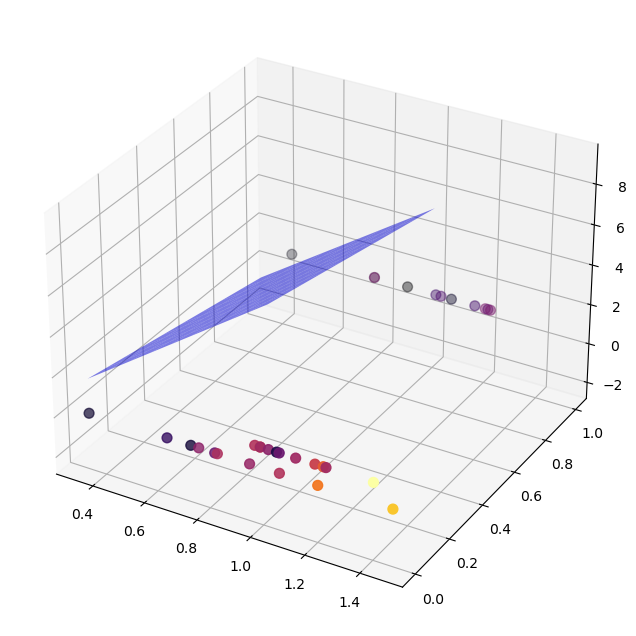

In [89]:
multireg(df['Area'],df['X2'],df['X3'],df['Infarc'])